# Ball Tracking using Matrix Methods

Below is an example of our ball tracking algorithm, including error analysis.

Import statements, uses math, numpy, and matplotlib packages and our built algorithm file.

In [1]:
import math 
import numpy as np 
import matplotlib.pyplot as plt
from algorithm import Algorithm

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


# Initial Conditions

The initial conditions can be freely set by the user.

In [2]:
ax = 0.0
ay = -9.8
vx0 = 40.75
vy0 = 250.25
x0 = 0.0
y0 = 0.0

# Creation of Simulation Data of a Ball's Projectile Motion

The Cord function returns the coordinates of the point in either the x or y direction, given that directions velocity, acceleration, and the time shared between directions.

In [3]:
def Cord(v,a,t):
    return v*t+0.5*a*t**2

An initial overestimate of the time it takes the ball to hit the ground is generated off the data, and then the cordinates are generated for x and y.  Using y, we cut tmax down to the actual time the ball hits the ground and round it up to the nearest integer.

In [4]:
tmax = vy0**2 + vx0**2
t = np.arange(tmax)
x = Cord(vx0,ax,t)
y = Cord(vy0,ay,t)

tmax = math.ceil(2*math.sqrt(2*np.max(y)/abs(ay)))

t = np.arange(tmax)
x = Cord(vx0,ax,t)
y = Cord(vy0,ay,t)

# Plot of Simulation Data

Below is a plot of x and y, showing the balls trajectory over space.

Text(0, 0.5, 'y')

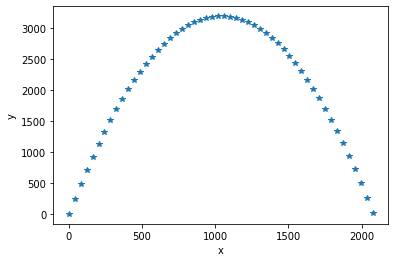

In [5]:
plt.plot(x,y, '*')
plt.xlabel('x')
plt.ylabel('y')

# Creation of Matrix of Ball SImulation Data to feed into Algorithm

Created a Matrix of the simiulation Ball Position.  This matrix is the only piece of information carried over from the original simulation.  The matrix must be square, thus we used the larger space dimention to make each frame square.  The matrix is 3D, the first 2 dimentions are x and y and the third, which need not be square, is time.

In [6]:
if (np.max(x) > np.max(y)):
    maxDim = math.ceil(np.max(x))+1
else:
    maxDim = math.ceil(np.max(y))+1
MATRIX = np.zeros((maxDim,maxDim,math.ceil(tmax)))

For every time frame, place a 1 in the matrix where the ball is located, and a zero elsewhere.

In [7]:
for i in range(tmax):
    MATRIX[int(x[i]),int(y[i]),i] = 1

# Below is the implementation of the algorithm.
A 1 dimentional matrix, named z, the same size as a side of the square frames is created, and has values in it listed from 0 to the max number of rows/columns (There are the same number of rows as there are columns as the matrix frames are square).  By takeing the dot products, we have $row=z\cdot M_i$ and $column=M_i\cdot z$, where $M_i$ is the square matrix at time i.  This is all contained in algorithm.py, in the Algorithm function.

In [8]:
row,column = Algorithm(MATRIX)

# Below is the plot of the results.

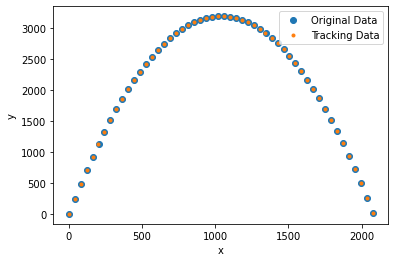

In [9]:
plt.plot(x,y, 'o', label = "Original Data")
plt.plot(row,column, '.', label = "Tracking Data")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

As can be seen, the original data and the tracking data are very similar indeed.

Now lets take a look at the average error:

In [10]:
errorX = np.mean(abs(row-x))
errorY = np.mean(abs(column-y))

In [11]:
print("The error in the row calculations is ", errorX)
print("The error in the column calculations is ", errorY)

The error in the row calculations is  0.375
The error in the column calculations is  0.5019230769227598


As can be seen, some error is evident in this system.  This is due to the fact that to make a continuous number line fit into a discrete matrix, we rounded the x and y coodinates down in order to have them fit in a matrix box.  Each matrix box is an integer value, so the decimal of the coordinates was erased.  This however gives us a well defined maximum average error of 0.5, half the size of a matrix box, across the board.

In [12]:
print("Max error point in rows for this run:", max(abs(row-x)))
print("Max error point in columns for this run:", max(abs(column-y)))

Max error point in rows for this run: 0.75
Max error point in columns for this run: 0.9999999999990905


However, the maximum error possible for a single box is .99999 repeating, as we rounded down to the nearest integer in constructing the matrix.

## Comparison to numpy.nonzeros

Below, we compare the time it takes to run numpy.nonzero to our algorithm.  The function numpy.nonzero finds the indicies of the nonzero elements of a matrix, which is what our algorithm does.

In [13]:
%time A,B = Algorithm(MATRIX)

CPU times: user 2.26 s, sys: 830 ms, total: 3.09 s
Wall time: 3.09 s


In [14]:
%time C = np.nonzero(MATRIX)

CPU times: user 3.48 s, sys: 0 ns, total: 3.48 s
Wall time: 3.45 s


As can be seen, our algorithm runs significantly faster than numpy.nonzero for the size matrix we use, but lets take a closer look by running both algorithms on various sized matrixes.

Test on large zero matrixes:

In [15]:
TEST = np.zeros((5000,5000,100))

In [16]:
%time A,B = Algorithm(TEST)

CPU times: user 12.9 s, sys: 6.1 s, total: 19 s
Wall time: 19 s


In [17]:
%time C = np.nonzero(TEST)

CPU times: user 16.1 s, sys: 0 ns, total: 16.1 s
Wall time: 16 s


Above, nonzeros won over our algorithm for a very large matrix size.

In [18]:
TEST = np.zeros((2500,2500,100))

In [19]:
%time A,B = Algorithm(TEST)

CPU times: user 3.31 s, sys: 1.67 s, total: 4.97 s
Wall time: 4.97 s


In [20]:
%time C = np.nonzero(TEST)

CPU times: user 4.02 s, sys: 0 ns, total: 4.02 s
Wall time: 4.02 s


Again, above nonzero won on this large matrix size.  Please note that these matrixes have a ball being thrown thousands of feet into the air.

In [21]:
TEST = np.zeros((1500,1500,100))

In [22]:
%time A,B = Algorithm(TEST)

CPU times: user 1.22 s, sys: 162 ms, total: 1.39 s
Wall time: 1.38 s


In [23]:
%time C = np.nonzero(TEST)

CPU times: user 1.46 s, sys: 113 µs, total: 1.46 s
Wall time: 1.46 s


Now, at about 1500ft and 100 time steps, our algorithm seems to start wining over nonzeros.

In [24]:
TEST = np.zeros((1000,1000,100))

In [25]:
%time A,B = Algorithm(TEST)

CPU times: user 547 ms, sys: 78.9 ms, total: 626 ms
Wall time: 625 ms


In [26]:
%time C = np.nonzero(TEST)

CPU times: user 651 ms, sys: 0 ns, total: 651 ms
Wall time: 650 ms


And at 1000 ft, our algorithm is beating out nonzeros again.

In [27]:
TEST = np.zeros((750,750,100))

In [28]:
%time A,B = Algorithm(TEST)

CPU times: user 298 ms, sys: 52.1 ms, total: 350 ms
Wall time: 349 ms


In [29]:
%time C = np.nonzero(TEST)

CPU times: user 370 ms, sys: 743 µs, total: 371 ms
Wall time: 370 ms


Still, at 750 ft our algorithm is winning over nonzeros as far as speed goes.

In [30]:
TEST = np.zeros((500,500,100))

In [31]:
%time A,B = Algorithm(TEST)

CPU times: user 141 ms, sys: 19.2 ms, total: 160 ms
Wall time: 160 ms


In [32]:
%time C = np.nonzero(TEST)

CPU times: user 166 ms, sys: 200 µs, total: 166 ms
Wall time: 166 ms


At 500 ft, our algorithm still beats nonzeros.

In [33]:
TEST = np.zeros((250,250,100))

In [34]:
%time A,B = Algorithm(TEST)

CPU times: user 39.8 ms, sys: 5.17 ms, total: 45 ms
Wall time: 44.3 ms


In [35]:
%time C = np.nonzero(TEST)

CPU times: user 42.8 ms, sys: 960 µs, total: 43.8 ms
Wall time: 43.1 ms


Now, at 250 ft nonzeros starts to win again.

In [36]:
TEST = np.zeros((100,100,100))

In [37]:
%time A,B = Algorithm(TEST)

CPU times: user 12.7 ms, sys: 943 µs, total: 13.7 ms
Wall time: 13.3 ms


In [38]:
%time C = np.nonzero(TEST)

CPU times: user 10.7 ms, sys: 0 ns, total: 10.7 ms
Wall time: 9.72 ms


And at 100 ft our algorithm loses to non zeros.

## Conclusions

As can be seen from the above runs, our algorithm is faster than numpy.nonzero for a specific range of matrix values.  Matrixes that are not to small, yet not to big.  For example with 100 time steps, our algorithm beats numpy.nonzero for the approximate range of heights from 500ft to 1500 ft.  Therefore, this algorithm is suitible for certain problems resulting in certain size matrixes.